## *Введение* 

Для данного исследования были выбраны **основные демографические показатели** из монографии 2015 года:
1) среднегодовая численность населения;
2) рождаемость и смертность, на 1000 чел.;
3) естественный прирост, на 1000 чел.;
4) средняя ожидаемая продолжительность жизни;
5) коэффициент демографической нагрузки (сколько лиц нетрудоспособного возраста приходится на 1000 чел. трудоспособного).


Из статистических изданий Росстата были выбраны значения данных показателей за период с 1990 по 2022 гг. Для разных параметров количество лет, за которые были приведены значения, отличались, например, данные по численности населения есть за каждый год за выбранный период, а по рождаемости и смертности толькраз в пять лет 
за исключением 2021 и 202.2
  

После нахождения и предобработки данных были получены таблицы формата *csv.*, с которыми дальше необходимо работать в *jyputer notebook*.


## *Импортируем необходимые нам библиотеки*

In [1]:
# перед импортом они должны быть обязательно загружены в jupiter через команду pip install pandas/matplotlib.pyplot/geopandas

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

Начинаем строить графики

## *Среднегодовая численность населения*

Открываем данные с помощью библиотеки pandas

Все таблицы имеют одинаковую шапку: первый столбец - *год*, последующие - *названия областей* (латинскими буквами)

In [4]:
pop = pd.read_csv('data/popilation.csv', delimiter = ';')
pop

,Year,Moskovskay,Tverskay,Leningradskay,Novgorodskay,Pskovskay
0,1990,6710213,1664673,1671237,752632,843524
1,1991,6719677,1655855,1677035,750360,840298
2,1992,6711729,1644359,1679691,747885,836869
3,1993,6690811,1633530,1678312,744533,834105
4,1994,6674551,1624324,1679369,740731,831083
5,1995,6665991,1616855,1684076,737455,828160
6,1996,6658948,1605807,1687281,733516,823404
7,1997,6657430,1591551,1691022,730610,816817
8,1998,6655334,1575181,1693135,727876,808856
9,1999,6640830,1555223,1690003,722290,798924


Строим график, на котором будет показана динамика численности населения для всех 5 областей

(1990.0, 2022.0)

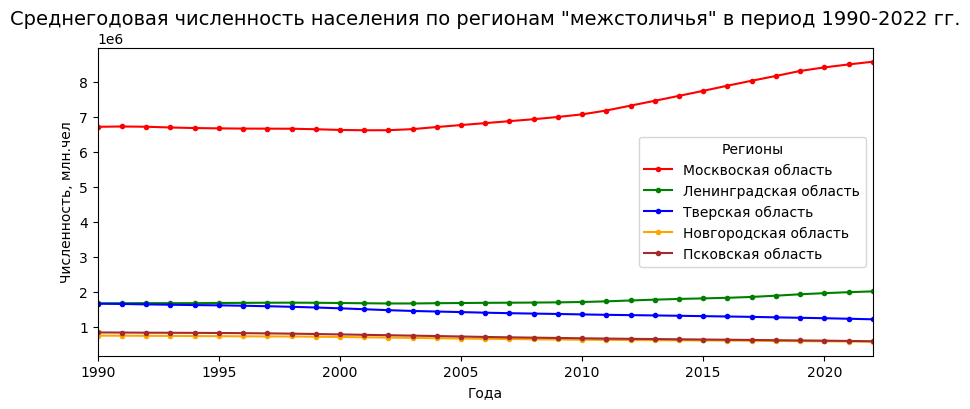

In [71]:
plt.figure(figsize=(10,4))
plt.plot(pop['Year'].values, pop['Moskovskay'].values, label='Москвоская область', color='red', marker='.')
plt.plot(pop['Year'].values, pop['Leningradskay'].values, label='Ленинградская область', color='green', marker='.')
plt.plot(pop['Year'].values, pop['Tverskay'].values, label='Тверская область', color='blue', marker='.')
plt.plot(pop['Year'].values, pop['Novgorodskay'].values, label='Новгородская область', color='orange', marker='.')
plt.plot(pop['Year'].values, pop['Pskovskay'].values, label='Псковская область', color='brown', marker='.')
plt.title('Среднегодовая численность населения по регионам "межстоличья" в период 1990-2022 гг.', fontsize=14)
plt.xlabel('Года', fontsize=10)
plt.ylabel('Численность, млн.чел', fontsize=10)
plt.legend(title='Регионы')
plt.xlim(1990,2022)

**Анализ**

Можно заметить, что за исследуемый период в Московской области проживало практически в два (и даже более) раза больше людей, чем во всех остальных областях. Также именно в Московской области наблюдался яркий положительный тренд: за 30 лет численность населения увеличилась примерно на 2 млн.

Но втором месте по численности населения находилась Ленинградская область, тем не менее она не намного опрережает Новгородскую, Псковскую и Тверскую области. За исследуемый период численность населения в этом регионе оставалось практически неизменной - около 2 млн. 

Третий по численности регион - Тверская область. Здесь заметен уже отрицательный тренд: численность населения за рассматриваемые года уменьшилась примерно на 400 тыс. человек. 

Самые низкие значения у данного показателя наблюдались в Псковской и Новгородской областях, за все 30 лет они были примерно одинаковы по численности населения. В конце 21 в. Псковская область была чуть более населённой, чем Новгородская, но к 2022 г. они сравнялись. 

## *Рождаемость и смертность на 1000 чел.*

Открываем csv-таблицу с данными по *рождаемости*

In [33]:
birth1000 = pd.read_csv('data/birth1000.csv', delimiter=';')
birth1000

,Year,Leningradskaya,Pskovskaya,Novgorodskaya,Tverskaya,Moskovskaya
0,1990,11.0,11.9,12.3,11.5,10.2
1,1995,7.2,7.7,7.9,7.5,7.2
2,2000,6.7,7.4,7.5,7.5,7.2
3,2005,7.6,8.8,9.3,9.2,8.8
4,2010,8.8,10.5,11.3,10.9,10.9
5,2015,9.0,11.0,11.9,11.2,12.9
6,2020,7.1,8.0,8.2,8.0,10.3
7,2021,6.8,8.2,7.8,7.7,9.5
8,2022,6.0,7.3,7.4,7.3,8.6


Теперь строим графики, отражающий изменения данного показателя за исследуемый период

(1990.0, 2022.0)

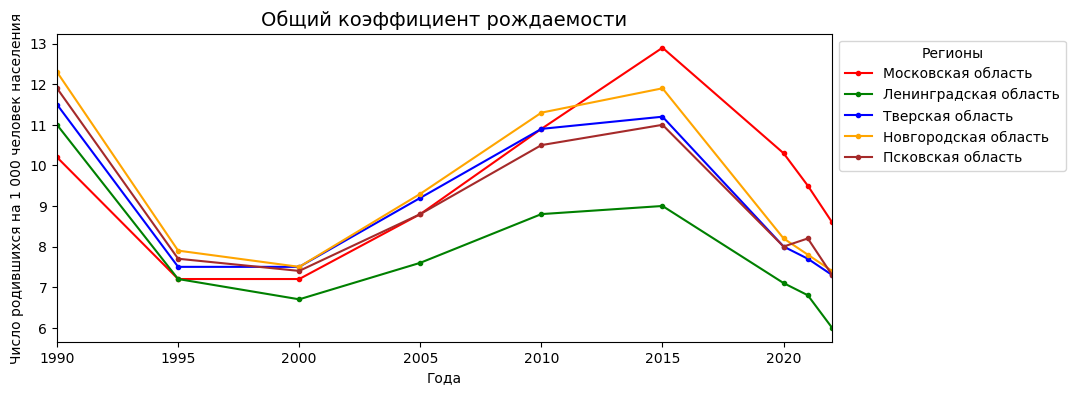

In [35]:
plt.figure(figsize=(10,4))
plt.plot(birth1000['Year'].values, birth1000['Moskovskaya'].values, label='Московская область', color='red', marker='.')
plt.plot(birth1000['Year'].values, birth1000['Leningradskaya'].values, label='Ленинградская область', color='green', marker='.')
plt.plot(birth1000['Year'].values, birth1000['Tverskaya'].values, label='Тверская область', color='blue', marker='.')
plt.plot(birth1000['Year'].values, birth1000['Novgorodskaya'].values, label='Новгородская область', color='orange', marker='.')
plt.plot(birth1000['Year'].values, birth1000['Pskovskaya'].values, label='Псковская область', color='brown', marker='.')

plt.title('Общий коэффициент рождаемости', fontsize=14)
plt.xlabel('Года', fontsize=10)
plt.ylabel('Число родившихся на 1 000 человек населения', fontsize=10)
plt.legend(title='Регионы', fontsize=10, bbox_to_anchor=(1,1))
plt.xlim(1990,2022)

**Анализ**

Общий тренд для все графиков: резкое понижение рождаемости в период с 1990 по 1995 год, а после 2000 г. снова наблюдается рост, который достигает пика в середине 2010-х (этот рост скорее всего связан с "демографическим бумом" в России после 2000 года). Затем рождаемость снова начинает снижаться.

1) Московская область до 1995 года имела самый низкий уровень рождаемости, но после 2015 года остаётся в лидерах.
2) Ленинградская область обадает самой низкой рождаемостью в период 2010-х годов.
3) Кривые Тверской, Псковской и Новогородской областей схожи. Псковская область - единственный из регионов, имеющий в 2021 году повышение рождаемости.

Рассмотрим данные по *смертности*

In [12]:
death1000 = pd.read_csv('data/death1000.csv', delimiter=';')
death1000

,Year,Leningradskaya,Pskovskaya,Novgorodskaya,Tverskaya,Moskovskaya
0,1990,12.5,15.1,14.1,14.8,12.2
1,1995,18.2,20.8,19.7,19.4,17.6
2,2000,18.9,22.0,19.8,20.8,17.3
3,2005,19.9,24.6,22.5,23.0,17.1
4,2010,15.8,21.2,20.0,20.1,15.4
5,2015,14.0,18.2,17.5,17.7,13.0
6,2020,14.9,19.0,18.2,18.5,14.5
7,2021,16.9,21.7,22.3,21.5,16.3
8,2022,12.9,18.3,17.1,17.9,11.7


(1990.0, 2022.0)

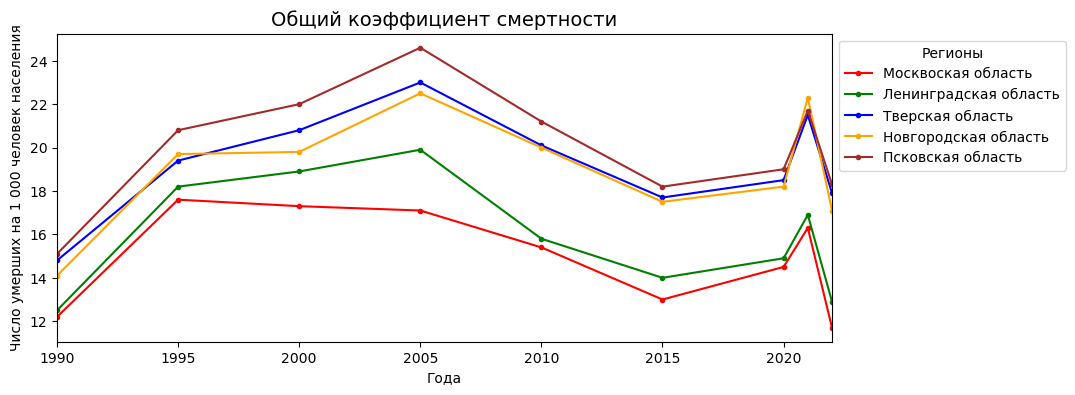

In [14]:
plt.figure(figsize=(10,4))
plt.plot(death1000['Year'].values, death1000['Moskovskaya'].values, label='Москвоская область', color='red', marker='.')
plt.plot(death1000['Year'].values, death1000['Leningradskaya'].values, label='Ленинградская область', color='green', marker='.')
plt.plot(death1000['Year'].values, death1000['Tverskaya'].values, label='Тверская область', color='blue', marker='.')
plt.plot(death1000['Year'].values, death1000['Novgorodskaya'].values, label='Новгородская область', color='orange', marker='.')
plt.plot(death1000['Year'].values, death1000['Pskovskaya'].values, label='Псковская область', color='brown', marker='.')

plt.title('Общий коэффициент смертности', fontsize=14)
plt.xlabel('Года', fontsize=10)
plt.ylabel('Число умерших на 1 000 человек населения', fontsize=10)
plt.legend(title='Регионы', fontsize=10, bbox_to_anchor=(1,1))
plt.xlim(1990,2022)

**Анализ**

Во всех 5-ти регионах "межстоличья" наблюдается тренд повышения уровня смертности вплоть до 2005 года (кроме Московской области, в которой снижение смертности началось с 1995 года). Далее после пика 2005 года и до 2015 года можно увидить снижение показателя. Резкий пик смертности во всех регионах в 2020 году связан с пандемией короновируса. После 2020 года наблюдается явное уменьшение смертности.

## *Естественный прирост населения*

Открываем таблицу

In [50]:
natural_population_growth = pd.read_csv('data/natural_population_growth.csv', delimiter=';')
natural_population_growth

,Year,Leningradskaya,Pskovskaya,Novgorodskaya,Tverskaya,Moskovskaya
0,1990,-1.5,-3.2,-1.8,-3.4,-2.0
1,2000,-12.1,-14.7,-12.4,-13.5,-10.0
2,2010,-7.0,-10.7,-8.7,-9.2,-4.5
3,2020,-7.8,-11.0,-10.0,-10.5,-4.2
4,2022,-6.9,-11.0,-9.7,-10.6,-3.1


Строим график с иллюстрацией данных по ЕП исследуемых регионов

(1990.0, 2022.0)

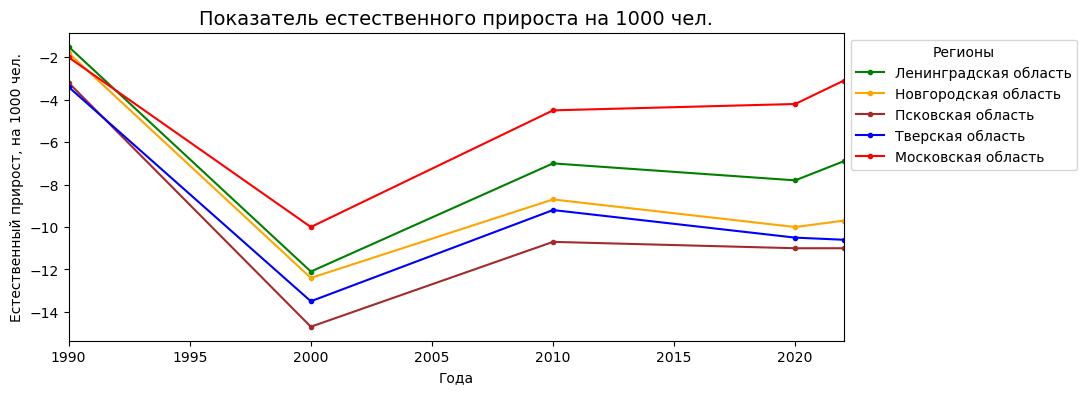

In [54]:
plt.figure(figsize=(10,4))

# Настраиваем для данных по естественному приросту каждого региона значения по y. Шкала годов у всех регионов одинаковая
x = natural_population_growth['Year'].values
y_L_ng = natural_population_growth['Leningradskaya'].values # ng - обозначение natural growth 
y_N_ng = natural_population_growth['Novgorodskaya'].values
y_P_ng = natural_population_growth['Pskovskaya'].values
y_T_ng = natural_population_growth['Tverskaya'].values
y_M_ng = natural_population_growth['Moskovskaya'].values

# Строим графики с созданными значениями x и y, а также присваиваем каждому графику имя
plt.plot(x, y_L_ng, marker='.', label='Ленинградская область', color='green')
plt.plot(x, y_N_ng, marker='.', label='Новгородская область', color='orange')
plt.plot(x, y_P_ng, marker='.', label='Псковская область', color='brown')
plt.plot(x, y_T_ng, marker='.', label='Тверская область', color='blue')
plt.plot(x, y_M_ng, marker='.', label='Московская область', color='red')

plt.title('Показатель естественного прироста на 1000 чел.', fontsize=14)
plt.xlabel('Года', fontsize=10) 
plt.ylabel('Естественный прирост, на 1000 чел.', fontsize=10)
plt.legend(title='Регионы', fontsize=10, bbox_to_anchor=(1,1)) 
plt.xlim(1990,2022)

**Анализ**

Все регионы до 2010 показывают одинаковый тренд: упадок до самых низких значений в 2000 году, дальнейший подъем до 2010 года. Однако после показатели всех областей, кроме Московской, вновь идут вниз, пока, начиная, с 2020 года не приобретают положительный тренд. Только уровень естественного прироста Тверской области продолжает медленно падать. График Московского региона же противоположен: уровень растёт. Пристоличный регион выделяется заметной положительной динамикой. 

В итоге самый большой показатель у Московской области, самый низкий - у Псковской.

В 2000 году наблюдалась минимальная рождаемость во всех регионах, что можно увидеть по графику, а показатель смертности рос. Отсюда такое низкое значение коэффициента естественного прироста. К 2010 году графики обоих показателей начинают сходиться - естественный прирост увеличиватется. Нет данных за 2015 год, но мы можем предположить, что они покажут максимум за исследуемый период. В 2020 резко подскочила смертность, что можно связать с избыточной смертностью за счёт коронавируса. К ней добавилась вновь сокращающаяся рождаемость - заметное снижение коэффициента ЕП. И к 2022 из-за уменьшения коэффициента смертности коэффициент ЕП пополз вверх.

## *Средняя ожидаемая продолжительность жизни* 

Открываем csv файл

In [16]:
life_expectancy = pd.read_csv('data/life_expectancy.csv', delimiter=';')
life_expectancy

,Year,Leningradskaya,Pskovskaya,Novgorodskaya,Tverskaya,Moskovskaya
0,1990,68.30,68.10,67.60,68.30,69.60
1,2000,64.00,62.00,63.50,63.00,65.50
2,2010,68.09,64.59,65.04,65.90,69.13
3,2020,71.53,69.13,69.59,69.76,71.67
4,2022,73.33,68.95,70.45,69.94,73.78


Далее совмещаем графики ожидаемой продолжительности жизни всех исследуемых регионов

(1990.0, 2022.0)

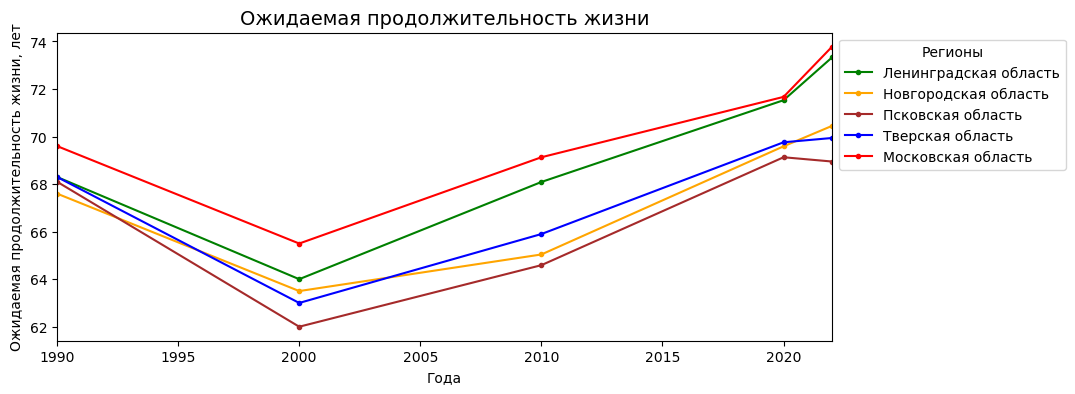

In [185]:
plt.figure(figsize=(10,4))

# Настраиваем для данных по ОПЖ каждого региона значения по y. Шкала годов у всех регионов одинакова
x = life_expectancy['Year'].values
y_L_le = life_expectancy['Leningradskaya'].values
y_N_le = life_expectancy['Novgorodskaya'].values
y_P_le = life_expectancy['Pskovskaya'].values
y_T_le = life_expectancy['Tverskaya'].values
y_M_le = life_expectancy['Moskovskaya'].values

# Строим графики с созданными значениями x и y, а также присваиваем каждому графику наименование
plt.plot(x, y_L_le, marker='.', label = 'Ленинградская область', color='green') # le - обозначение life expecyancy
plt.plot(x, y_N_le, marker='.', label = 'Новгородская область', color='orange')
plt.plot(x, y_P_le, marker='.', label = 'Псковская область', color='brown')
plt.plot(x, y_T_le, marker='.', label = 'Тверская область', color='blue')
plt.plot(x, y_M_le, marker='.', label = 'Московская область', color='red')

plt.title('Ожидаемая продолжительность жизни', fontsize=14)
plt.xlabel('Года', fontsize=10) 
plt.ylabel('Ожидаемая продолжительность жизни, лет', fontsize=10)
plt.legend(title='Регионы', fontsize=10, bbox_to_anchor=(1,1)) #Делаем легенду: настраиваем размер и расположение относительно графика
plt.xlim(1990,2022)

**Анализ**

Как правило с годами ожидаемая продолжительность жизни в странах растёт, так как повышается уровень жизни граждан. Однако в России этот показатель сильно упал с 1990 по 2000 год. Это изменение можно объяснить несколькими факторами, среди которых ухудшение социально-экономических условий, вызванное последствиями распада СССР, кризисом в экономике, всеми прелестями лихих 90-х. Но после преодоления 2000 года ожидаемая продолжительность жизни во всех регионах, кроме одного, растёт. Причем в Ленинградской и Московской областях, регионах Пристоличья, растёт стремительно. 

Лидирует, как неудивительно, Московская область. А вот у Псковской области показатель медленно снижается с 2020 года: у этого региона самый высокий коэффициент смертности в рассматриваемой группе. 

## Коэффициент демографической нагрузки

Открываем таблицу

In [56]:
burden = pd.read_csv('data/demograph_burden.csv', delimiter = ';')
burden

,Year,Moskovskay,Tverskay,Leningradskay,Novgorodskay,Pskovskay
0,1990,721,868,772,837,857
1,1995,729,862,762,825,842
2,2000,656,759,659,730,744
3,2003,604,693,599,669,678
4,2004,591,675,584,653,661
5,2005,589,661,576,640,648
6,2010,613,694,624,695,690
7,2011,623,713,638,718,711
8,2012,636,735,653,748,736
9,2013,653,759,671,779,762


Визуализируем на одном графике значени для каждой области

(1990.0, 2022.0)

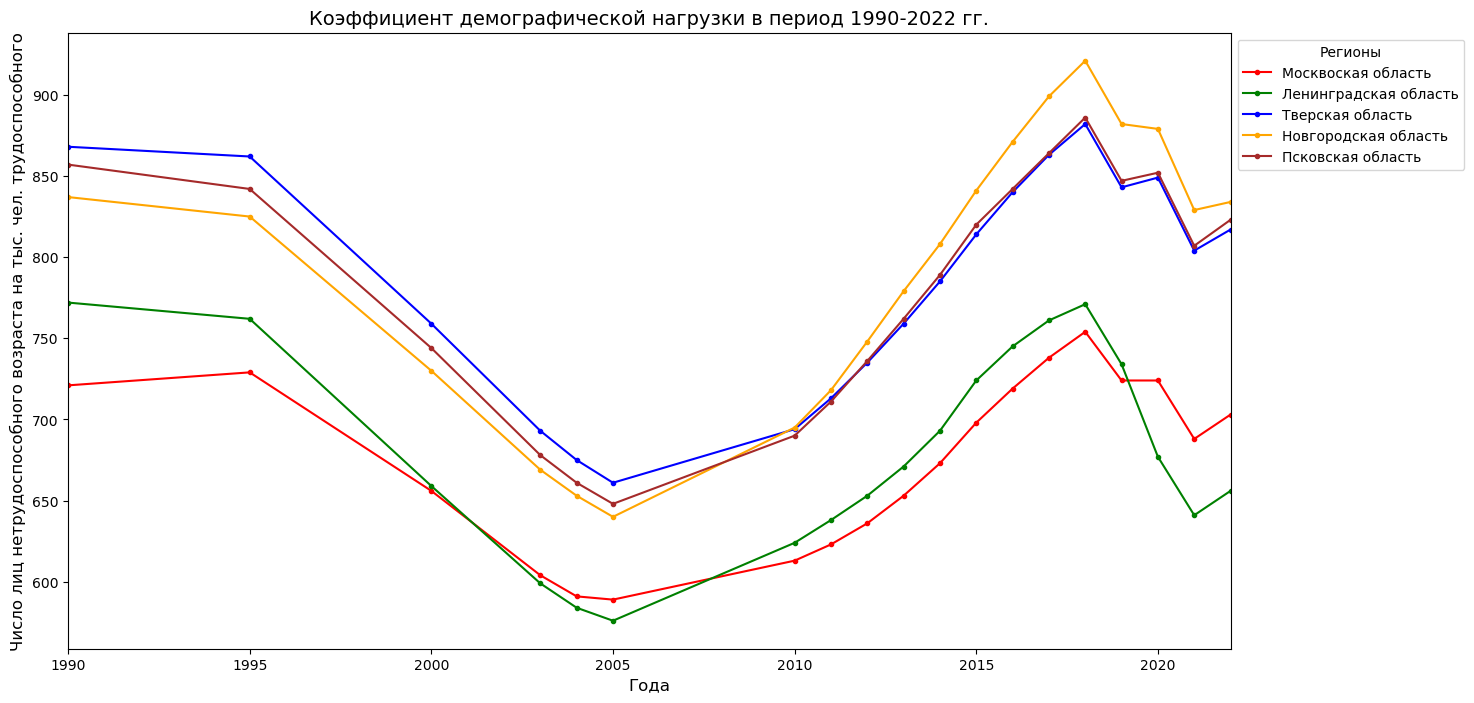

In [77]:
plt.figure(figsize=(15,8))
plt.plot(burden['Year'].values, burden['Moskovskay'].values, label='Москвоская область', color='red', marker='.')
plt.plot(burden['Year'].values, burden['Leningradskay'].values, label='Ленинградская область', color='green', marker='.')
plt.plot(burden['Year'].values, burden['Tverskay'].values, label='Тверская область', color='blue', marker='.')
plt.plot(burden['Year'].values, burden['Novgorodskay'].values, label='Новгородская область', color='orange', marker='.')
plt.plot(burden['Year'].values, burden['Pskovskay'].values, label='Псковская область', color='brown', marker='.')

plt.title('Коэффициент демографической нагрузки в период 1990-2022 гг.', fontsize=14)
plt.xlabel('Года', fontsize=12) 
plt.ylabel('Число лиц нетрудоспособного возраста на тыс. чел. трудоспособного', fontsize=12)
plt.legend(title='Регионы', fontsize=10, bbox_to_anchor=(1,1))
plt.xlim(1990,2022)

**Анализ**

Общий тренд для рассматриваемых регионов: понижение коэффициента демографической нагрузки в период с 1990 по 2005 года, что связано с понижением рождаемости и возможным ростом трудоспособного населения, а далее рост данного параметра с пиком в 2018 году (наибольший коэффициент в этот год имеет Новогородская область - 921 чел.). Для всех регионов кроме Ленинградской области снижение коэффициента демографической нагрузки с 2018 года имеет вид "лесенки" с пиком в 2020 году.

## *Визуализация данных на карте с помощью библиотеки geopandas*

Визуализируем, как пример, один из показателей на карте - общий коэффициент рождаемости за 2022 год. Для этого изначально в ArcGIS был создан shp-файл с исследуемыми регионами, а в таблицу атрибутов добавлены наши данные по рождаемости

In [36]:
regions_birth_2022 = r'data/contour_russian_borders' # считываем данные из папки (в ней кроме shp-файла должны содержатся все файлы, связанные с ним)
shp = gpd.read_file(regions_birth_2022)
shp.tail() # открываем таблицу атрибутов (смотрим, в каком столбце содержатся данные по рождаемости)

,Birth_2022,Name,geometry
0,7.4,Новгородская область,"POLYGON Z ((36.22869 58.58247 0, 36.22309 58.5..."
1,7.3,Тверская область,"POLYGON Z ((38.32686 57.30093 0, 38.32684 57.2..."
2,6.0,Ленинградская область,"POLYGON Z ((35.69788 61.2074 0, 35.69668 61.00..."
3,7.3,Псковская область,"POLYGON Z ((31.51786 56.30609 0, 31.51784 56.3..."
4,8.6,Московская область,"POLYGON Z ((40.20105 55.35074 0, 40.20214 55.3..."


Визуализируем

Text(0.5, 1.0, 'Общий коэффициент рождаемости в исследуемых регионах 2022 год')

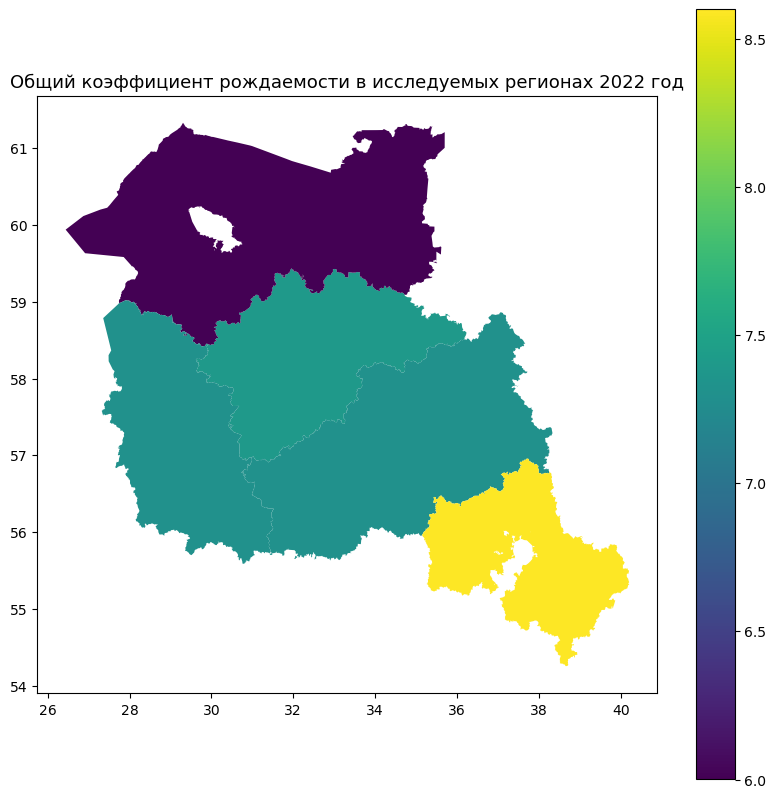

In [46]:
shp.plot(column='Birth_2022', legend=True, figsize=(10,10)) 
plt.title('Общий коэффициент рождаемости в исследуемых регионах 2022 год', fontsize=13)

## Вывод

Опираясь на проанализированные показатели, можно выделить главные закономерности. 

Во-первых, практически на всех графиках выделяется группа из трёх областей: Новгородской, Тверской и Псковской. Значения показателей для этих регионов довольно схожи, особенны заметны различия при сравнении с Ленинградской и Московской областями. 
Во-вторых, выделяется пара из пристоличных регионов. Чаще всего их показатели не сильно разняться , а также отчасти имеют значения выше или ниже (в зависимости от показателя). Тем нее менее, Московская область — явный лидер в "межстоличье" по данным демографическим показателям на 2022 г. г.